In [ ]:
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
import pylab

# **Bandpass Filter (Appendix 1)**

# Specifications 

---

In [ ]:
delta = 0.15
tr_band = 4

In [ ]:
fp1 = 62.3
fp2 = 82.3
fs2 = fp2+4
fs1 = fp1-4
f = [fp1, fp2, fs1, fs2]
fs = 330

# Digital domain 

In [ ]:
factor = 2*3.14/330
wp1 = f[0]*factor 
wp2 = factor*f[1]
ws1 = factor*f[2]
ws2 = factor*f[3]
w = [wp1, wp2, ws1, ws2]
w = np.array(w, dtype ="f")

# Analog Domain

In [ ]:
import math
omega =np.tan(w/2)

omega


array([0.67360973, 0.9954082 , 0.6196368 , 1.074204  ], dtype=float32)

# Conversion to specifications of a low pass filter 

___

In [ ]:
omega_l = math.sqrt(omega[0]*omega[1])
b = omega[1] - omega[0] 

omega_ls1 = (omega[2]**2-omega_l**2)/(b*omega[2])
omega_ls2 = (omega[3]**2-omega_l**2)/(b*omega[3])
omega_ls = min(abs(omega_ls1), abs(omega_ls2))
omega_ls


1.3984075337463846

In [ ]:
D1 = (1/(1-delta)**2)-1
D2 = (1/(delta**2))-1

In [ ]:
N = np.arccosh(np.sqrt(D2)/np.sqrt(D1))/np.arccosh(omega_ls)
N = np.ceil(N)
epsilon = np.sqrt(D1)
N

4.0

# IIR Filter Design (Chebyschev Filter)

___

# Finding the poles for LPF specifications

In [ ]:
poles = np.zeros(int(2*N),dtype='complex64')
B_k = np.arcsinh(1/epsilon)/N
for k in range(2*int(N)):
	A_k = (2*k+1)*np.pi/(2*N)
	poles[k] = np.sin(A_k)*np.sinh(B_k) + (1.j)*np.cos(A_k)*np.cosh(B_k)

left_poles = np.zeros([0],dtype='complex64')
for s in poles:
  if(s.real<= 0):
    left_poles=np.append(left_poles,s)
left_poles

array([-0.12216229-0.9698117j , -0.29492587-0.40170914j,
       -0.29492587+0.40170914j, -0.12216229+0.9698117j ], dtype=complex64)

# Plotting the poles for LPF Specifications

Text(0.5, 0, 'Real part')

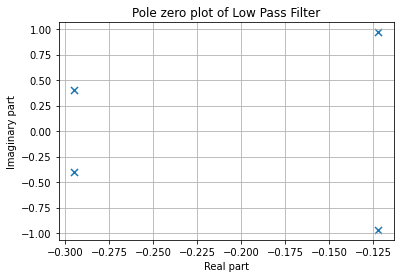

In [ ]:
plt.figure(1)
plt.grid(True)	
plt.scatter(left_poles.real,left_poles.imag,s=50,marker='x')
plt.title('Pole zero plot of Low Pass Filter')
plt.ylabel('Imaginary part')
plt.xlabel('Real part')

Text(0.5, 0, 'Real part')

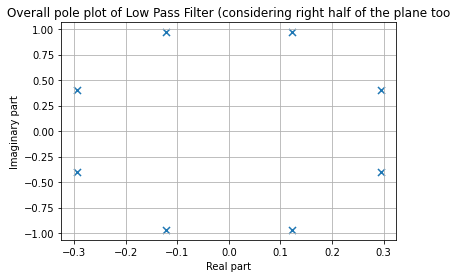

In [ ]:
plt.figure(1)
plt.grid(True)	
plt.scatter(poles.real,poles.imag,s=50,marker='x')
plt.title('Overall pole plot of Low Pass Filter (considering right half of the plane too')
plt.ylabel('Imaginary part')
plt.xlabel('Real part')

# Converting the function into analog domain 

Text(0.5, 0, 'Real')

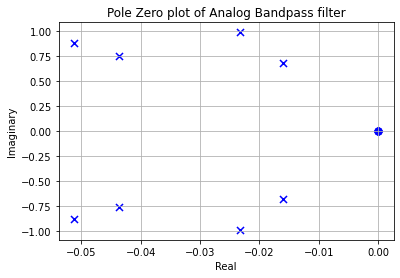

In [ ]:
chebyshev_k = 1
for k in range(int(N)):
		chebyshev_k = chebyshev_k*poles[k]

analog_numer = chebyshev_k.real
analog_denom = 1+0.j
for c in poles:
	if(c.real<= 0):
		analog_numer = np.poly1d([b,0],r=0)*analog_numer 
		analog_denom = np.poly1d([1,-b*c,omega_l**2],r=0)*analog_denom

z,p,k=sg.tf2zpk(analog_numer,analog_denom)

plt.figure(5)
plt.grid(True)
plt.scatter(p.real,p.imag,s=50,c='b',marker='x')
plt.scatter(z.real,z.imag,s=50,c='b',marker='o')
plt.title('Pole Zero plot of Analog Bandpass filter')
plt.ylabel('Imaginary')
plt.xlabel('Real')

# Converting to digital domain 

Text(0.5, 0, 'Real')

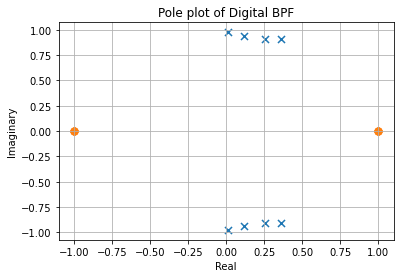

In [ ]:
digital_numer=chebyshev_k.real
digital_denom=1+0.j
for c in poles:
  if(c.real<= 0):
    digital_numer = np.poly1d([b,0,-b],r=0)*digital_numer 
    digital_denom = np.poly1d([(omega_l**2-b*c+1),((2*omega_l**2)-2),(omega_l**2+b*c+1)],r=0)*digital_denom

z,p,k = sg.tf2zpk(digital_numer,digital_denom)

plt.figure(4)
plt.grid(True)
plt.scatter(p.real,p.imag,s=50,marker='x')
plt.scatter(z.real,z.imag,s=50,marker='o')
plt.title('Pole plot of Digital BPF')
plt.ylabel('Imaginary')
plt.xlabel('Real')

# Final Frequency Response 

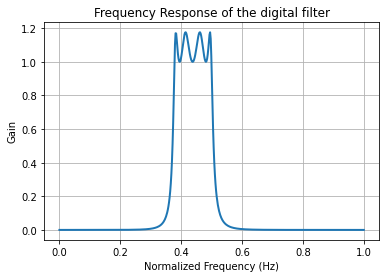

In [ ]:

plt.clf()
plt.grid(True)
w,h= sg.freqz(digital_numer,digital_denom)
plt.plot((w/max(w)), np.absolute(h), linewidth=2)
plt.xlabel('Normalized Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Frequency Response of the digital filter')
plt.show()

# FIR Filter Design

___

# Premilinary Calculations 

In [ ]:
A = -20*math.log10(delta)
delta_w = 2*3.14*4000/330000


N = np.ceil((A-8)/(2*2.285*delta_w)) + 5 # Added tha value of 5 so that less ripples exist 


# Ideal Impulse Response 

In [ ]:
wc1= wp1
wc2 = wp2 
iterable   = ((np.sin(wc2*k)-np.sin(wc1*k))/(np.pi*k) for k in range(int(-N),int(N+1)))
h_ideal    = np.fromiter(iterable,float)
h_ideal[int(N)] = ((wc2-wc1)/np.pi)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


# Kaiser Window 

In [ ]:
h_kaiser = sg.kaiser(2*N+1,0) # Know that the value of beta is 0
h_org    = h_ideal*h_kaiser

# Plotting the frequency response of the filter 

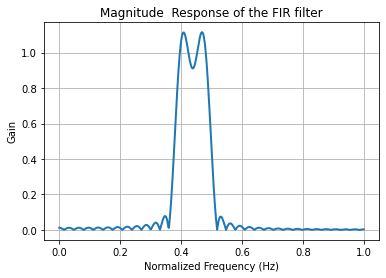

In [ ]:

plt.clf()
plt.grid(True)
w,h= sg.freqz(h_org)
plt.plot(w/max(w), np.absolute(h), linewidth=2)
plt.xlabel('Normalized Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Magnitude  Response of the FIR filter')
plt.show()

# Plotting the phase response of the filter 

Text(0.5, 1.0, 'Phase response of the FIR filter')

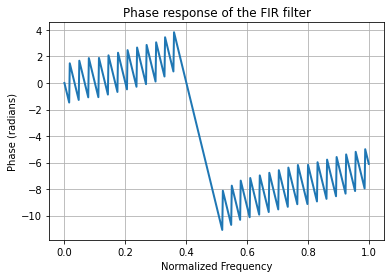

In [ ]:

plt.grid(True)

hPhase = pylab.unwrap(np.arctan2(np.imag(h),np.real(h)))
plt.plot(w/max(w),hPhase,linewidth=2)
plt.ylabel('Phase (radians)')
plt.xlabel(r'Normalized Frequency')
plt.title(r'Phase response of the FIR filter')